# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

from numpy.f2py.rules import numpy_version


In [365]:
data = pd.read_csv('data/forestfires.csv')

day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

data['day'] = data['day'].map(day_mapping)
data['month'] = data['month'].map(month_mapping)

X_initial = data[["X","Y", "month",	"day",	"FFMC",	"DMC", "DC", "ISI",	"temp",	"RH",	"wind",	"rain"]]
Y_initial = data[["area"]]

X_initial.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [366]:
Y_initial.head()

,area
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [367]:
def h(X, W):
    return np.dot(X, W)

In [474]:
def Error(X, W, Y,lam, regularization = "Ridge"):
    
    if(regularization == "Ridge"):
        return np.sum((Y - h(X, W)) ** 2) / (2 * len(X)) + lam * np.sum(W ** 2)
    elif (regularization == "Lasso"):
        return np.sum((Y - h(X, W)) ** 2) / (2 * len(X)) + lam * np.sum(np.sign(W)) 



In [475]:
def derivada(X, W, Y, lam, regularization = "Ridge"):

    yh = (Y-h(X, W)).transpose()
    dwj = np.dot(yh, -1 * X).transpose() / len(Y) 
    if(regularization == "Ridge"):
        dwj = dwj + 2 * lam * W 
    elif (regularization == "Lasso"):
        dwj = dwj +  lam * np.sign(W)    
   
    return dwj

In [370]:
def update(W,  dW, alpha):
  return W - dW * alpha

In [476]:
def train(X, Y, epochs, alfa,lam, regularization = "Ridge"):
    np.random.seed(2001)
    W = np.array([np.random.rand() for i in range(X.shape[1])])
    L = Error(X,W,Y,lam, regularization)
    # print("Inicial", L)
    loss = []
    for i in range(epochs):
        dW = derivada(X, W, Y,lam, regularization)
        W = update(W, dW, alfa)
        L = Error(X, W,Y,lam, regularization)
        loss.append(L)
    return W, loss

In [374]:
def r2_adjusted(y_true, y_pred, p):
    den_r2 = (y_true - np.mean(y_true)) ** 2
    num_r2 = (y_pred - np.mean(y_true)) ** 2
    r2 = np.sum(num_r2) / np.sum(den_r2)

    num = len(y_true) - 1
    den = len(y_true) - p - 1
    return 1 - (1 - r2) * (num / den)



### Exploratory Data Analysis

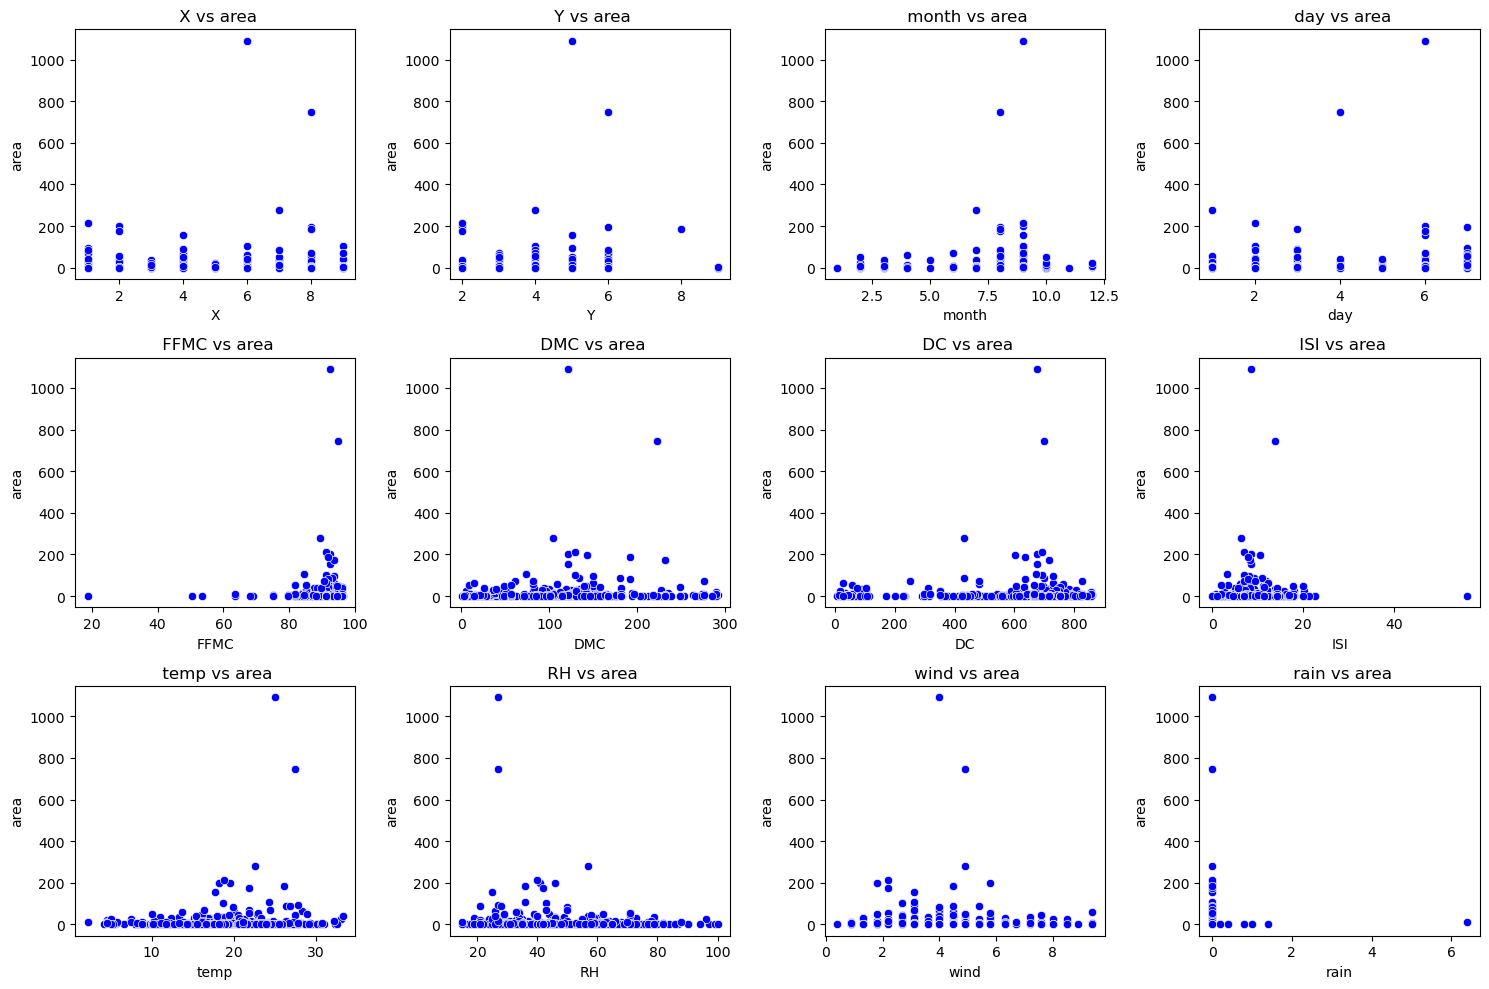

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

area_col = data.columns[-1]
variables = data.columns[:-1]

plt.figure(figsize=(15, 10))

# Graficos de dispersion area vs variable
for i, var in enumerate(variables):
    plt.subplot(3, 4, i + 1)

    sns.scatterplot(x=data[var],y=data[area_col], color='blue')
    plt.title(f' {var} vs {area_col}')
    plt.xlabel(var)
    plt.ylabel(area_col)


plt.tight_layout()
plt.show()

<Axes: ylabel='area'>

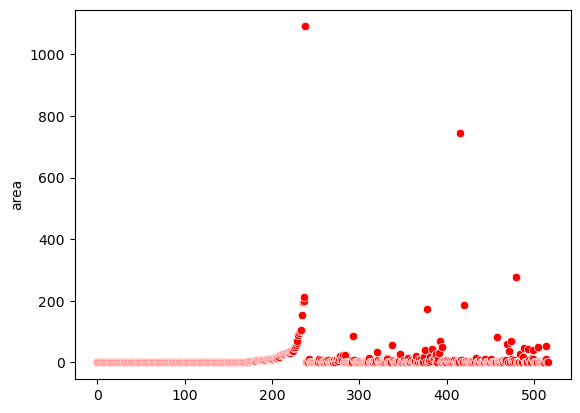

In [376]:
sns.scatterplot(data["area"], color="red")

In [496]:

x_vars = np.array(X_initial[["X","Y", "month",	"day",	"FFMC",	"DMC", "DC", "ISI",	"temp",	"RH",	"wind",	"rain"]])

# y_area = np.array(Y_initial["area"])
y_area = np.log(1 + np.array(Y_initial["area"]))
# y_area = np.sqrt(np.array(Y_initial["area"]))


for i in range(x_vars.shape[1]):
    
    col = x_vars[:, i]  
    
    col = (col - np.min(col)) / (np.max(col) - np.min(col))  
    x_vars[:, i] = col  
    


y_norm  =  (y_area - min(y_area))/(max(y_area) - min(y_area))



<Axes: >

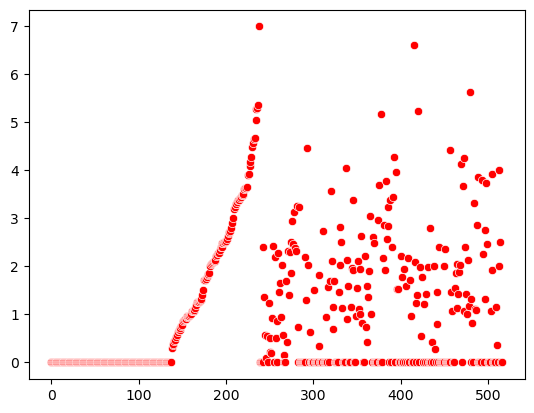

In [378]:
sns.scatterplot(y_area, color="red")

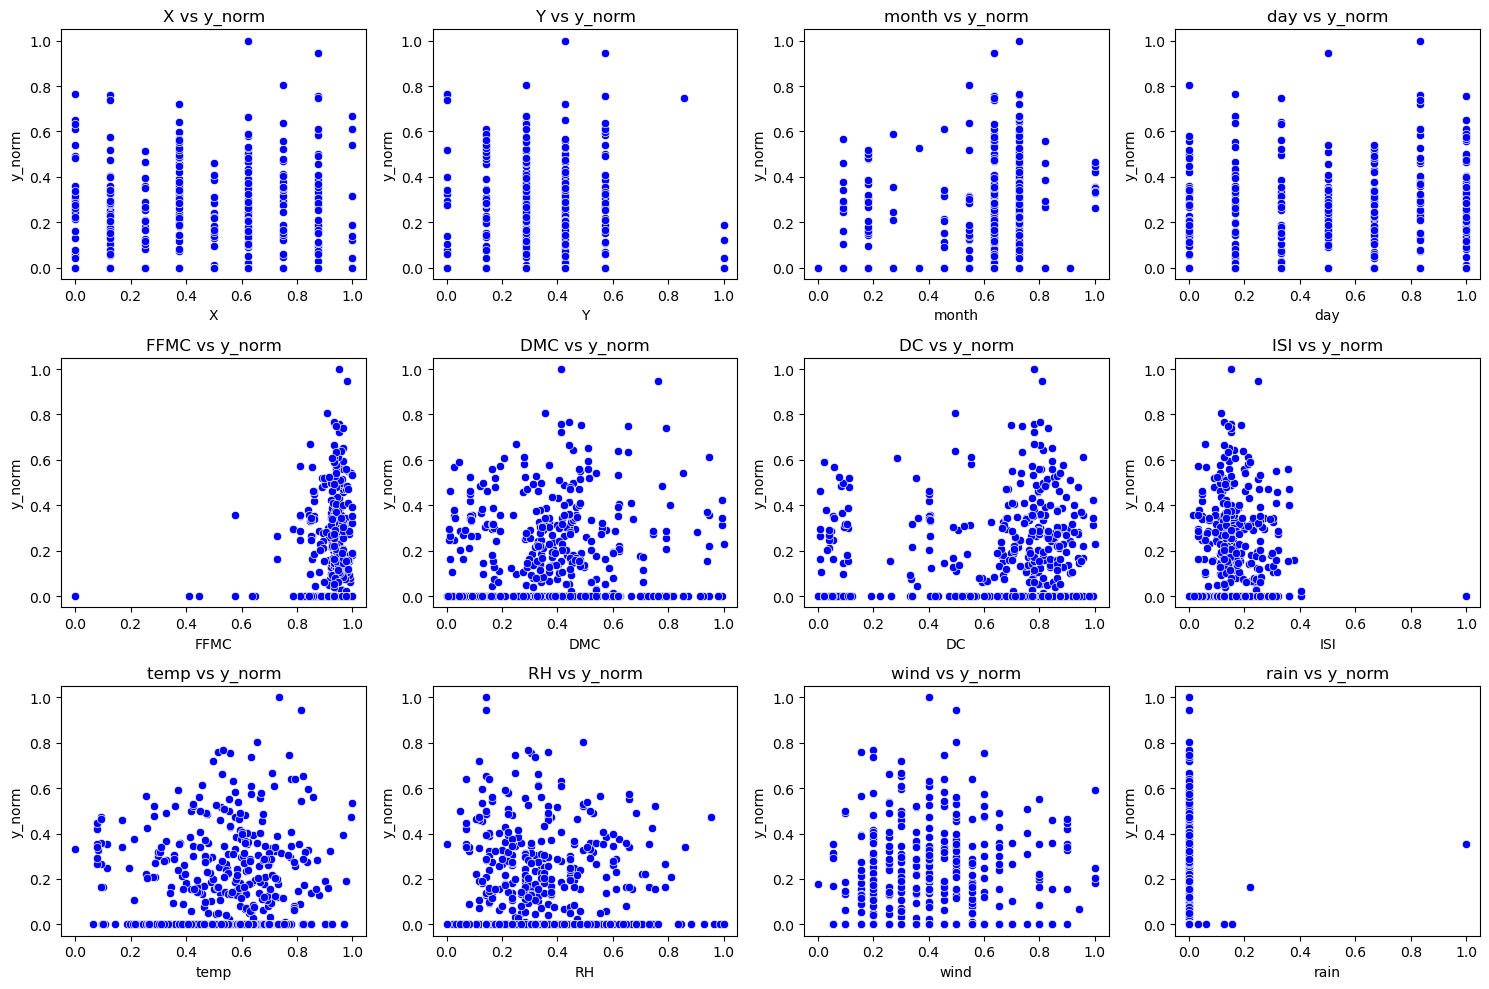

In [379]:
x_names = ["X", "Y", "month", "day", "FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain"]

plt.figure(figsize=(15, 10))

for i, name in enumerate(x_names):
    plt.subplot(3, 4, i + 1)  
    sns.scatterplot(x=x_vars[:, i], y=y_norm, color='blue')
    plt.title(f'{name} vs y_norm')
    plt.xlabel(name)
    plt.ylabel('y_norm')

plt.tight_layout()
plt.show()

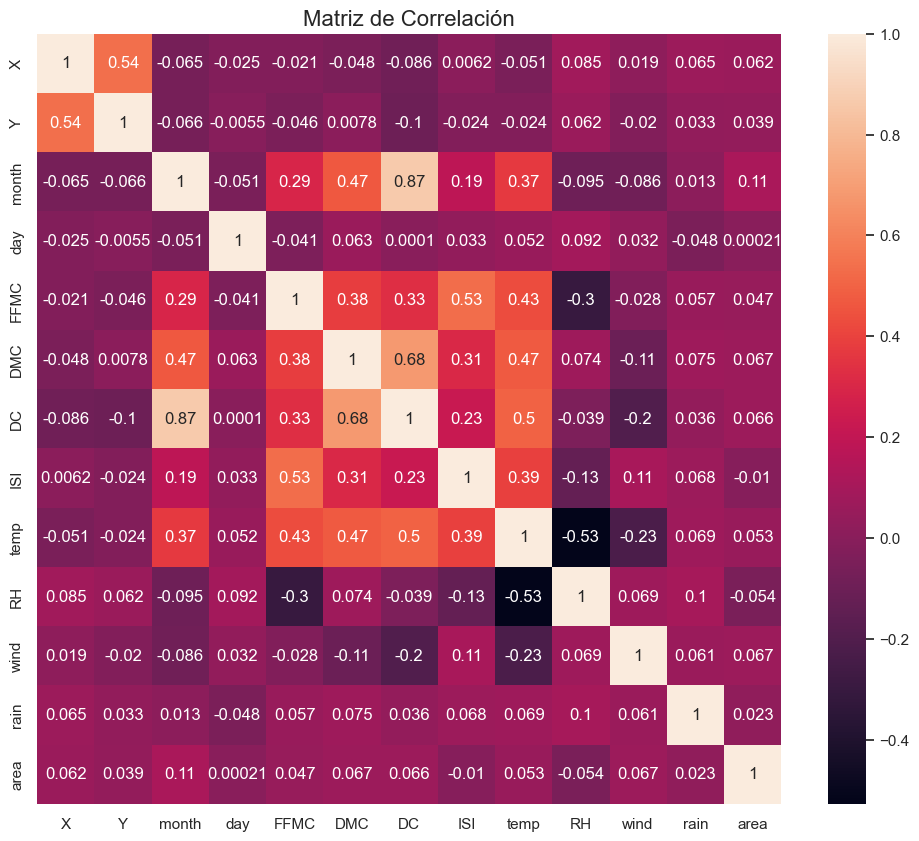

In [499]:
sns.set(style="white")


new_data = pd.DataFrame(x_vars, columns=x_names)
new_data['area'] = y_norm

correlation_matrix2 = new_data.corr()


plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix2, annot=True)

plt.title('Matriz de Correlación', fontsize=16)
plt.show()

In [380]:
# Split
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x_vars, y_norm, random_state=104, test_size=0.30, shuffle=True)

### Multivariate Polynomial Regression without fit (no entra en el informe)

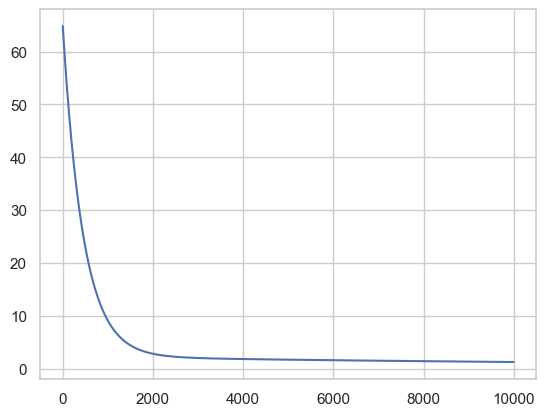

In [470]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(x_train)


X_poly_ones = np.hstack( (np.ones((X_poly.shape[0], 1)), X_poly) )
# w2 , loss2 = train(X_poly_ones,y_train, 45000, 0.0005, 0.2)
w2 , loss2 = train(X_poly_ones,y_train, 10000, 0.0001, 0.1)
plt.plot(loss2)




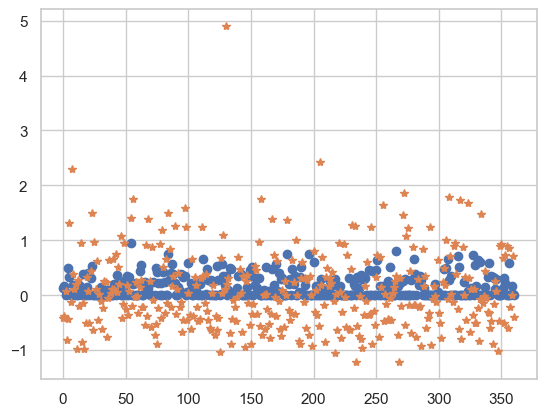

In [471]:
y_aprox2 = h(X_poly_ones, w2)
# y_aprox = h(X_poly,w)
plt.plot(y_train, "o")
plt.plot(y_aprox2, "*")



In [472]:
print("R2 train:", r2_adjusted(y_train, y_aprox2, X_poly.shape[1] - 1))
X_test_poly = poly.fit_transform(x_test)
X_test_poly_ones = np.hstack( (np.ones((X_test_poly.shape[0], 1)), X_test_poly) )
print("R2 test:", r2_adjusted(y_test, h(X_test_poly_ones , w2),  X_poly.shape[1] - 1))

R2 train: 16.338145382235062
R2 test: 24.268781676673942


### Multivariate Linnear Regression (own, Ridge)

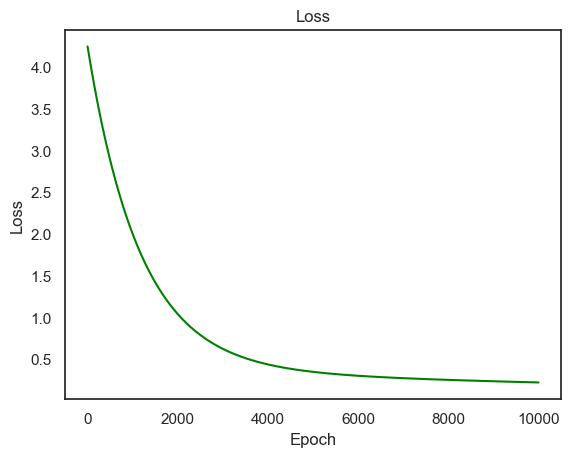

[-0.3371945  -0.15301943  0.54695081  0.40697841  0.17413757 -0.11431588
  0.31588146 -0.1351761   0.19299911 -0.14734963 -0.01074714  0.4736643
  0.47306932]


In [500]:
x_linnear = np.hstack((np.ones((x_train.shape[0], 1)), x_train))

w3 , loss3 = train(x_linnear, y_train, 10000, 0.0001, 0.15)
# w3 , loss3 = train(x_linnear, y_train, 200000, 0.0001, 0.1)


y_aprox3 = h(x_linnear,w3)

# plt.plot(loss3)


sns.lineplot(loss3, color='green') # called a line plot, lists as x and y
plt.title('Loss') # added a title
plt.xlabel('Epoch') # added a x-axis label
plt.ylabel('Loss') # added a y-axis label
plt.show()

print(w3)

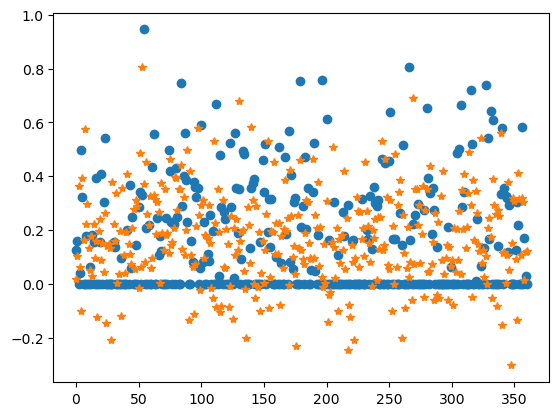

In [429]:
# y_aprox = h(X_poly,w)
plt.plot(y_train, "o")
plt.plot(y_aprox3, "*")


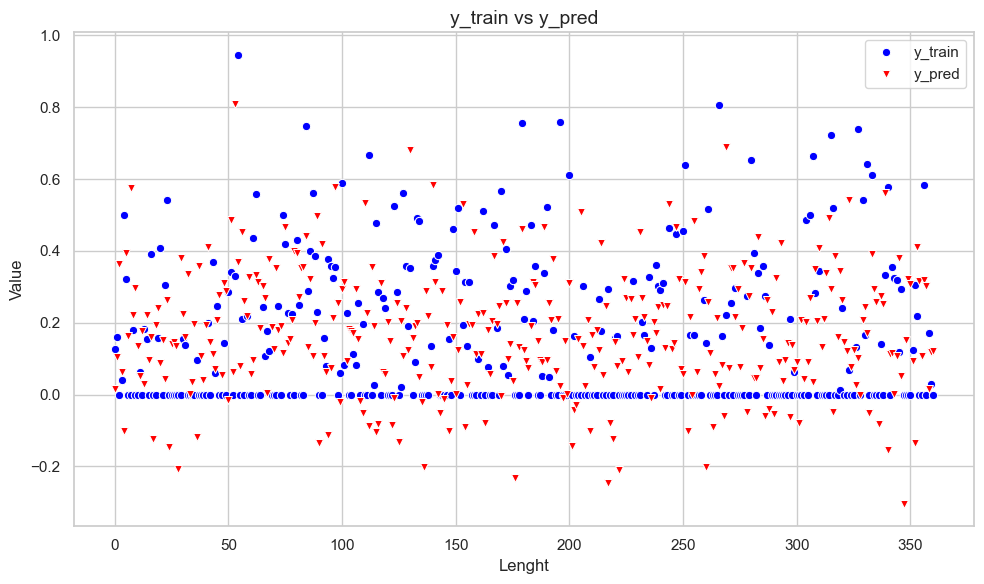

In [440]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(y_train)), y=y_train, marker="o", color="blue", label="y_train", linestyle="")
sns.lineplot(x=range(len(y_aprox3)), y=y_aprox3, marker="v", color="red", label="y_pred", linestyle="")

plt.title('y_train vs y_pred', fontsize=14)
plt.xlabel('Lenght', fontsize=12)
plt.ylabel('Value', fontsize=12)

plt.legend()

plt.tight_layout()
plt.show()

In [430]:
print("R2 train:", r2_adjusted(y_train, y_aprox3, 12))
X_test_lin = np.hstack( (np.ones((x_test.shape[0], 1)), x_test) )

print("R2 test:", r2_adjusted(y_test, h(X_test_lin , w3), 12))

R2 train: 0.7263786214326213
R2 test: 0.6276676202634432


In [420]:
print(w3)

[-0.33879662 -0.1530874   0.54042972  0.40185019  0.16188843 -0.11617757
  0.3092327  -0.1408441   0.19117797 -0.14834456 -0.01472978  0.46452916
  0.47228326]


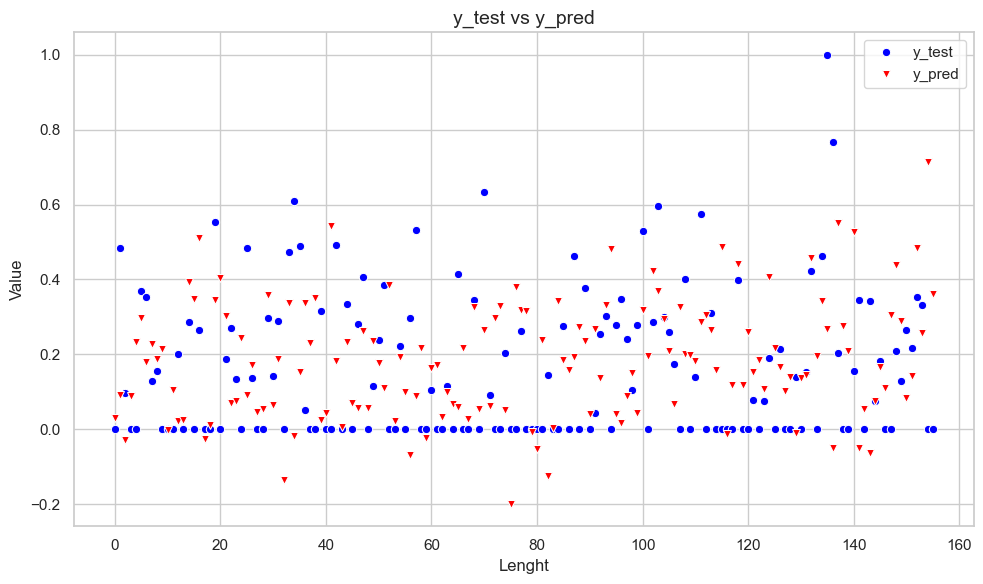

In [442]:

X_test_lin = np.hstack( (np.ones((x_test.shape[0], 1)), x_test) )



sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(y_test)), y=y_test, marker="o", color="blue", label="y_test", linestyle="")
sns.lineplot(x=range(len(y_test)), y=h(X_test_lin , w3), marker="v", color="red", label="y_pred", linestyle="")

plt.title('y_test vs y_pred', fontsize=14)
plt.xlabel('Lenght', fontsize=12)
plt.ylabel('Value', fontsize=12)

plt.legend()

plt.tight_layout()
plt.show()

### 10-fold Cross Validation   

R2 train 1 : 0.715619196875471
R2 test: 1 : 0.4863118420632019
R2 train 2 : 0.7038597429621292
R2 test: 2 : 0.9770081540322554
R2 train 3 : 0.6853958625082115
R2 test: 3 : 0.9139533520095007
R2 train 4 : 0.7012796876551523
R2 test: 4 : 0.6891495118443061
R2 train 5 : 0.7401642960520747
R2 test: 5 : 0.260509312758311
R2 train 6 : 0.6970143194728424
R2 test: 6 : 0.8837805405743249
R2 train 7 : 0.669205515045743
R2 test: 7 : 0.9536172016156246
R2 train 8 : 0.7136408303206684
R2 test: 8 : 0.44085727446186307
R2 train 9 : 0.713917537785624
R2 test: 9 : 0.5233687260216078
R2 train 10 : 0.7208504407767453
R2 test: 10 : 0.5236972337011576


<function matplotlib.pyplot.show(close=None, block=None)>

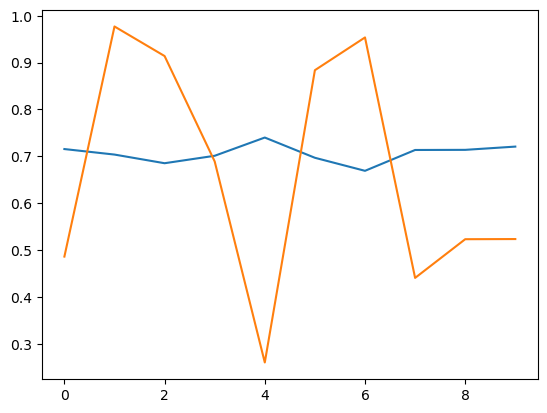

In [422]:
from sklearn.model_selection import KFold


n_folds = 10
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=41)

r2_scores_train = []
r2_scores_test = []

i = 0
for train_index, test_index in kfold.split(x_vars, y_norm):
    i = i + 1
    x_traink, x_testk = x_vars[train_index], x_vars[test_index]
    y_traink, y_testk = y_norm[train_index], y_norm[test_index]
    
    x_traink = np.hstack((np.ones((x_traink.shape[0], 1)), x_traink))
    
    if i == 4:
        # Extract data for the 4th fold
        x_train_fold4 = x_vars[train_index]
        y_train_fold4 = y_norm[train_index]
        x_test_fold4 = x_vars[test_index]
        y_test_fold4 = y_norm[test_index]

    
    
    w , loss = train(x_traink, y_traink, 10000, 0.0001, 0.15)
    y_aproxk = h(x_traink,w)
    
    scoreTrain =r2_adjusted(y_traink, y_aproxk, 12)
    r2_scores_train.append(scoreTrain)
    
    x_testk = np.hstack((np.ones((x_testk.shape[0], 1)), x_testk))
    scoreTest = r2_adjusted(y_testk, h(x_testk , w), 12)
    r2_scores_test.append(scoreTest)
    
    # print(x_traink.shape, y_traink.shape, x_testk.shape, y_testk.shape)
    print("R2 train" , i, ":", scoreTrain)
    
    print("R2 test:", i, ":", scoreTest)

plt.plot(r2_scores_train)
plt.plot(r2_scores_test)
plt.show

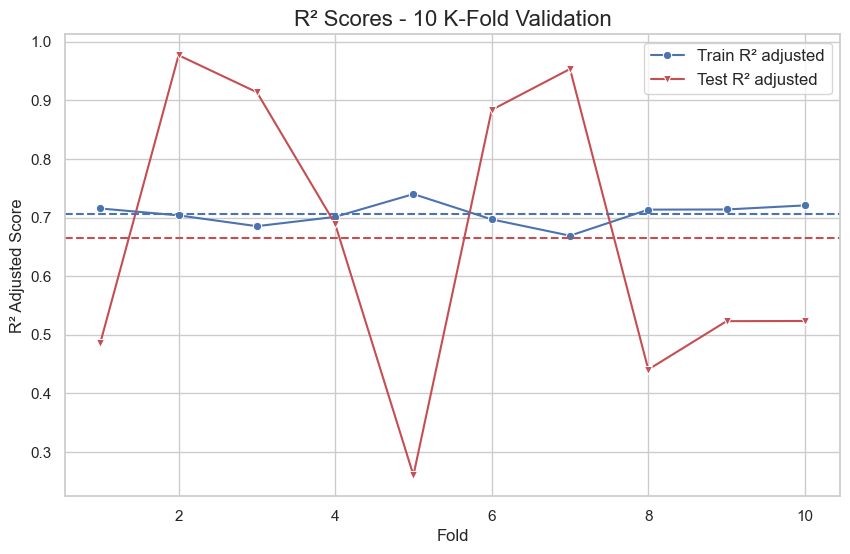

In [473]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.lineplot(x=np.arange(1, len(r2_scores_train)+1), y=r2_scores_train, label="Train R² adjusted", color="b", marker="o")
sns.lineplot(x=np.arange(1, len(r2_scores_test)+1), y=r2_scores_test, label="Test R² adjusted", color="r", marker="v")

plt.title('R² Scores - 10 K-Fold Validation', fontsize=16)
plt.xlabel('Fold', )
plt.ylabel('R² Adjusted Score')

plt.legend(loc='best', fontsize=12)

plt.axhline(np.mean(r2_scores_train), color='b', linestyle='--', label='Train Mean R² adjusted')
plt.axhline(np.mean(r2_scores_test), color='r', linestyle='--', label='Test Mean R² adjusted')

plt.show()

In [423]:
print("R2 train:", np.mean(r2_scores_train))
print("R2 test:", np.mean(r2_scores_test))

R2 train: 0.706094742945466
R2 test: 0.6652253149082152


### Lasso Regression

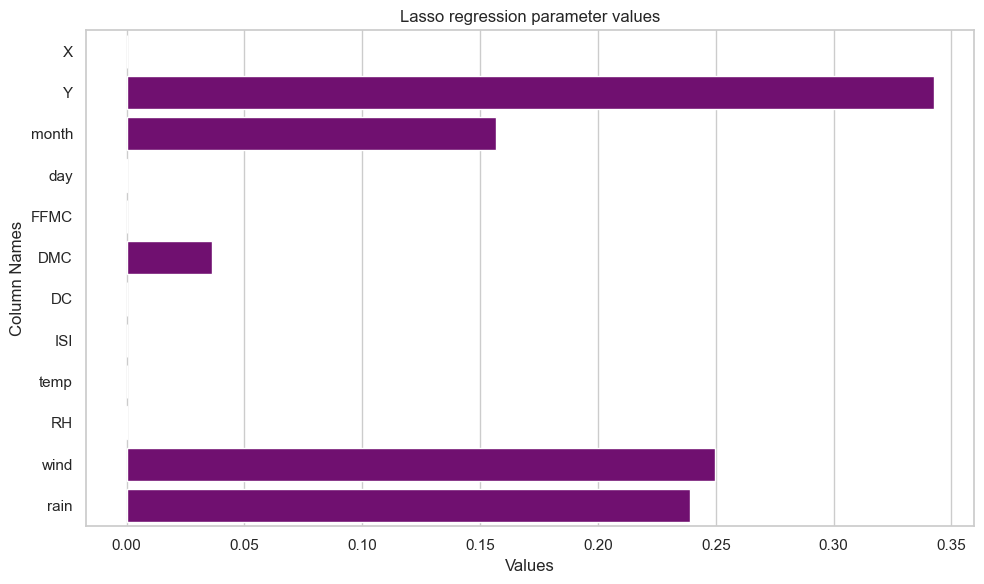

[-1.00321061e-01  1.23190648e-05  3.42423361e-01  1.56608311e-01
 -3.60124030e-05 -2.13169383e-05  3.60463085e-02  1.33321752e-05
  2.60807709e-05  2.38519351e-05 -4.01719935e-05  2.49782151e-01
  2.39179865e-01]


In [502]:
x_linnear2 = np.hstack((np.ones((x_train.shape[0], 1)), x_train))

w4 , loss4 = train(x_linnear, y_train, 10000, 0.0001, 0.4, "Lasso")


data4 = pd.DataFrame({'names': x_names,'values': w4[1:] })

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='values', y='names', data=data4, color='purple')
plt.title('Lasso regression parameter values')
plt.xlabel('Values')
plt.ylabel('Column Names')

plt.tight_layout()
plt.show()

print(w4)
